In [198]:
import pandas as pd

train_data = pd.read_csv("Data/train.csv")
train_data.head()  # we will only use text and target

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [199]:
X = train_data["text"]
y = train_data["target"]


In [200]:
X_train = pd.DataFrame(X)
y_train = pd.DataFrame(y)
X_train

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
7608,Two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @TheTawniest The out of control w...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611,Police investigating after an e-bike collided ...


In [201]:
X_train = X_train.applymap(lambda x : x.lower() if isinstance(x, str) else x)
X_train

C:\Users\amrk6\AppData\Local\Temp\ipykernel_21824\1652793265.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x : x.lower() if isinstance(x, str) else x)


,text
0,our deeds are the reason of this #earthquake m...
1,forest fire near la ronge sask. canada
2,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...
...,...
7608,two giant cranes holding a bridge collapse int...
7609,@aria_ahrary @thetawniest the out of control w...
7610,m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611,police investigating after an e-bike collided ...


In [202]:
# replace everythig but words and white spaces
X_train = X_train.replace(to_replace= r'[^\w\s]', value='', regex=True)
X_train

,text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,13000 people receive wildfires evacuation orde...
4,just got sent this photo from ruby alaska as s...
...,...
7608,two giant cranes holding a bridge collapse int...
7609,aria_ahrary thetawniest the out of control wil...
7610,m194 0104 utc5km s of volcano hawaii httptcozd...
7611,police investigating after an ebike collided w...


In [203]:
# remove digits
X_train = X_train.replace(to_replace=r'\d', value='', regex=True)
X_train

,text
0,our deeds are the reason of this earthquake ma...
1,forest fire near la ronge sask canada
2,all residents asked to shelter in place are be...
3,people receive wildfires evacuation orders in...
4,just got sent this photo from ruby alaska as s...
...,...
7608,two giant cranes holding a bridge collapse int...
7609,aria_ahrary thetawniest the out of control wil...
7610,m utckm s of volcano hawaii httptcozdtoydebj
7611,police investigating after an ebike collided w...


In [204]:
import nltk
from nltk.tokenize import word_tokenize

X_train['text'] = X_train['text'].apply(word_tokenize)
X_train

,text
0,"[our, deeds, are, the, reason, of, this, earth..."
1,"[forest, fire, near, la, ronge, sask, canada]"
2,"[all, residents, asked, to, shelter, in, place..."
3,"[people, receive, wildfires, evacuation, order..."
4,"[just, got, sent, this, photo, from, ruby, ala..."
...,...
7608,"[two, giant, cranes, holding, a, bridge, colla..."
7609,"[aria_ahrary, thetawniest, the, out, of, contr..."
7610,"[m, utckm, s, of, volcano, hawaii, httptcozdto..."
7611,"[police, investigating, after, an, ebike, coll..."


In [205]:
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

X_train['text'] = X_train['text'].apply(lambda x: [word for word in x if word not in stopwords])
X_train

,text
0,"[deeds, reason, earthquake, may, allah, forgiv..."
1,"[forest, fire, near, la, ronge, sask, canada]"
2,"[residents, asked, shelter, place, notified, o..."
3,"[people, receive, wildfires, evacuation, order..."
4,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...
7608,"[two, giant, cranes, holding, bridge, collapse..."
7609,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,"[police, investigating, ebike, collided, car, ..."


# Lemmatization

In [206]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
X_train['text'] = X_train['text'].apply(lemmatize_tokens)
X_train

,text
0,"[deed, reason, earthquake, may, allah, forgive..."
1,"[forest, fire, near, la, ronge, sask, canada]"
2,"[resident, ask, shelter, place, notify, office..."
3,"[people, receive, wildfire, evacuation, order,..."
4,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...
7608,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,"[police, investigate, ebike, collide, car, lit..."


# EDA

In [207]:
X_train

,text
0,"[deed, reason, earthquake, may, allah, forgive..."
1,"[forest, fire, near, la, ronge, sask, canada]"
2,"[resident, ask, shelter, place, notify, office..."
3,"[people, receive, wildfire, evacuation, order,..."
4,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...
7608,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,"[police, investigate, ebike, collide, car, lit..."


Total number of words: 74510
Most common words: [('get', 434), ('like', 392), ('fire', 357), ('amp', 300), ('im', 299), ('go', 275), ('u', 254), ('new', 230), ('via', 220), ('one', 204)]


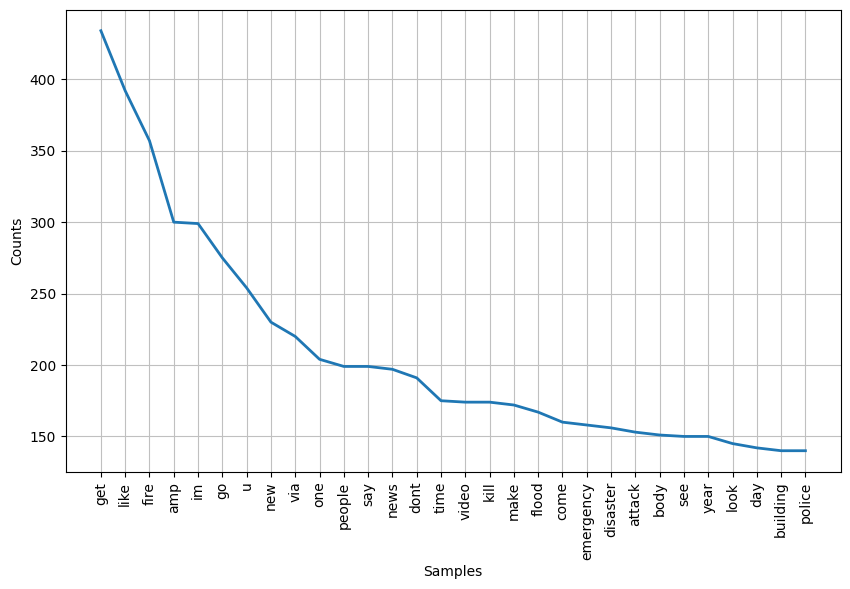

<Axes: xlabel='Samples', ylabel='Counts'>

In [208]:
import nltk
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of Words
all_words = [word for tokens in X_train['text'] for word in tokens]
word_freq = nltk.FreqDist(all_words)

print("Total number of words:", len(all_words))
print("Most common words:", word_freq.most_common(10))

# Plotting word frequency distribution
plt.figure(figsize=(10, 6))
word_freq.plot(30, cumulative=False)

In [209]:
X_train

,text
0,"[deed, reason, earthquake, may, allah, forgive..."
1,"[forest, fire, near, la, ronge, sask, canada]"
2,"[resident, ask, shelter, place, notify, office..."
3,"[people, receive, wildfire, evacuation, order,..."
4,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...
7608,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,"[aria_ahrary, thetawniest, control, wild, fire..."
7610,"[utckm, volcano, hawaii, httptcozdtoydebj]"
7611,"[police, investigate, ebike, collide, car, lit..."


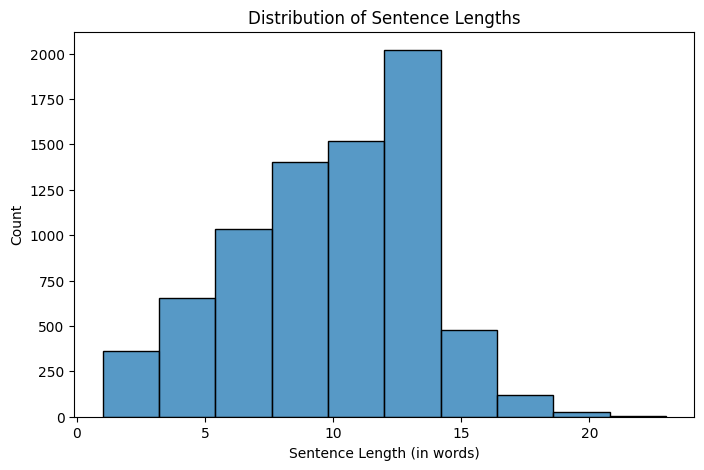

In [210]:
# Distribution of Sentence Lengths
X_train['sentence_lengths'] = X_train['text'].apply(len)

# Plotting sentence length distribution
plt.figure(figsize=(8, 5))
sns.histplot(X_train['sentence_lengths'], bins=10)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length (in words)')
plt.ylabel('Count')
plt.show()


In [211]:
X_train

,text,sentence_lengths
0,"[deed, reason, earthquake, may, allah, forgive...",7
1,"[forest, fire, near, la, ronge, sask, canada]",7
2,"[resident, ask, shelter, place, notify, office...",11
3,"[people, receive, wildfire, evacuation, order,...",6
4,"[get, sent, photo, ruby, alaska, smoke, wildfi...",9
...,...,...
7608,"[two, giant, crane, hold, bridge, collapse, ne...",9
7609,"[aria_ahrary, thetawniest, control, wild, fire...",11
7610,"[utckm, volcano, hawaii, httptcozdtoydebj]",4
7611,"[police, investigate, ebike, collide, car, lit...",14


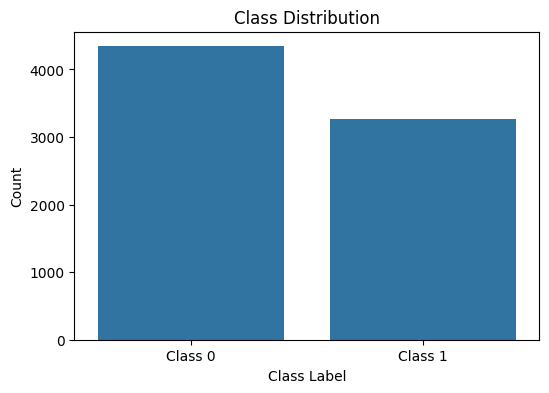

In [212]:
label_counts = y_train['target'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'])
plt.show()

In [213]:
# Assuming you have already performed text preprocessing and tokenization up to this point

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['text']) 

X_train_sequences = tokenizer.texts_to_sequences(X_train['text'])

max_length = 20  
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')

X_train_padded = np.array(X_train_padded)

print("Shape of X_train_padded:", X_train_padded.shape)


Shape of X_train_padded: (7613, 20)


In [219]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_padded, y_train, test_size=0.2, random_state=42)


In [226]:
vocab_size = len(tokenizer.word_index) + 1  
embedding_dim = 16
max_length = 20
import tensorflow as tf

# Define LSTM model with recommended adjustments
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(units=32, dropout=0.5, recurrent_dropout=0.5, return_sequences=True),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



a:\Pycharm\pycharm\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [230]:
num_epochs = 30
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_val, y_val), verbose=2)

Epoch 1/30
191/191 - 2s - 9ms/step - accuracy: 0.9468 - loss: 0.1982 - val_accuracy: 0.7781 - val_loss: 0.6025
Epoch 2/30
191/191 - 2s - 9ms/step - accuracy: 0.9511 - loss: 0.1834 - val_accuracy: 0.7787 - val_loss: 0.5674
Epoch 3/30
191/191 - 2s - 10ms/step - accuracy: 0.9616 - loss: 0.1421 - val_accuracy: 0.7846 - val_loss: 0.6523
Epoch 4/30
191/191 - 2s - 12ms/step - accuracy: 0.9670 - loss: 0.1333 - val_accuracy: 0.7768 - val_loss: 0.6954
Epoch 5/30
191/191 - 2s - 12ms/step - accuracy: 0.9701 - loss: 0.1174 - val_accuracy: 0.7505 - val_loss: 0.6894
Epoch 6/30
191/191 - 2s - 11ms/step - accuracy: 0.9747 - loss: 0.1033 - val_accuracy: 0.7551 - val_loss: 0.7346
Epoch 7/30
191/191 - 2s - 11ms/step - accuracy: 0.9793 - loss: 0.0898 - val_accuracy: 0.7623 - val_loss: 0.7693
Epoch 8/30
191/191 - 2s - 13ms/step - accuracy: 0.9783 - loss: 0.0893 - val_accuracy: 0.7617 - val_loss: 0.7454
Epoch 9/30
191/191 - 2s - 11ms/step - accuracy: 0.9842 - loss: 0.0733 - val_accuracy: 0.7728 - val_loss: 0

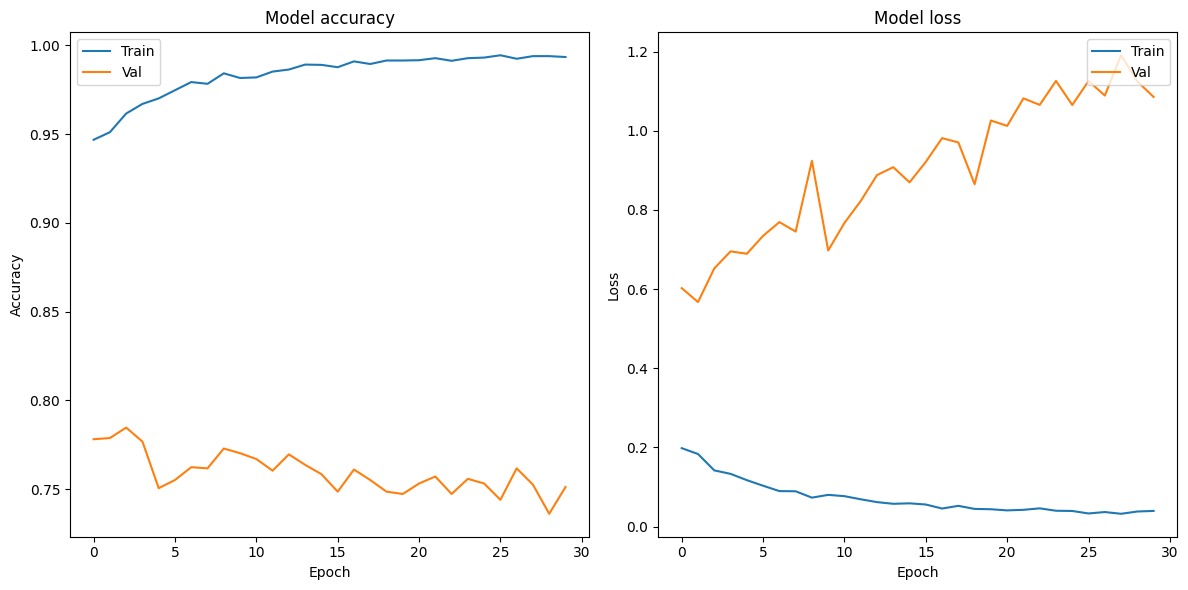

In [231]:
import matplotlib.pyplot as plt
# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper right')

    plt.tight_layout()
    plt.show()

plot_history(history)